## Data Understanding

In [1]:
# Import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the datasets
customers = pd.read_csv('./olist_customers_dataset.csv')
orders = pd.read_csv('./olist_orders_dataset.csv')
products = pd.read_csv('./olist_products_dataset.csv')
order_items = pd.read_csv('./olist_order_items_dataset.csv')
order_payments = pd.read_csv('./olist_order_payments_dataset.csv')
sellers = pd.read_csv('./olist_sellers_dataset.csv')
geolocation = pd.read_csv('./olist_geolocation_dataset.csv')
product_category_name_translation = pd.read_csv('./product_category_name_translation.csv')
order_reviews = pd.read_csv('./olist_order_reviews_dataset.csv')


In [5]:
# Check the info of the datasets
customers.info()
orders.info()
products.info()
order_items.info()
order_payments.info()
sellers.info()
geolocation.info()
product_category_name_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4

In [9]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [10]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [29]:
# List of the datasets
datasets = [customers, orders, products, order_items, order_payments, sellers, order_reviews]

# Checking basic information of each dataset 
for df, name in zip(datasets, ['customers', 'orders', 'products', 'order_items', 'order_payments', 'sellers', 'order_reviews']):
    print(f"==== {name} ====")
    print(df.shape)
    print(df.dtypes)
    print(df.isnull().sum())
    print(df.head(2))
    print("\n")


==== customers ====
(99441, 5)
customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  


==== orders ====
(99441, 8)
order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
ord

## EDA

In [30]:
# Null Ratio Check
for df, name in zip(datasets, ['customers', 'orders', 'products', 'order_items', 'order_payments', 'sellers', 'order_reviews']):
    null_ratio = df.isnull().mean().sort_values(ascending=False)
    print(f"==== {name} ====")
    print(null_ratio[null_ratio > 0])
    print("\n")


==== customers ====
Series([], dtype: float64)


==== orders ====
order_delivered_customer_date    0.029817
order_delivered_carrier_date     0.017930
order_approved_at                0.001609
dtype: float64


==== products ====
product_category_name         0.018512
product_name_lenght           0.018512
product_description_lenght    0.018512
product_photos_qty            0.018512
product_weight_g              0.000061
product_length_cm             0.000061
product_height_cm             0.000061
product_width_cm              0.000061
dtype: float64


==== order_items ====
Series([], dtype: float64)


==== order_payments ====
Series([], dtype: float64)


==== sellers ====
Series([], dtype: float64)


==== order_reviews ====
review_comment_title      0.883415
review_comment_message    0.587025
dtype: float64




In [32]:
# Duplicate Check
for df, name in zip(datasets, ['customers', 'orders', 'products', 'order_items', 'order_payments', 'sellers', 'order_reviews', 'geolocation', 'product_category_name_translation']):
    print(f"==== {name} duplicates ====")
    print(df.duplicated().sum())

==== customers duplicates ====
0
==== orders duplicates ====
0
==== products duplicates ====
0
==== order_items duplicates ====
0
==== order_payments duplicates ====
0
==== sellers duplicates ====
0
==== order_reviews duplicates ====
0


In [23]:
geolocation.duplicated().sum()

261831

In [33]:
# Change the datetime format 
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

order_reviews['review_creation_date'] = pd.to_datetime(order_reviews['review_creation_date'])
order_reviews['review_answer_timestamp'] = pd.to_datetime(order_reviews['review_answer_timestamp'])


In [34]:
# Check the unique values of categorical columns
print(orders['order_id'].nunique(), order_items['order_id'].nunique()) 
print(customers['customer_id'].nunique(), orders['customer_id'].nunique())
print(products['product_id'].nunique(), order_items['product_id'].nunique())


99441 98666
99441 99441
32951 32951


In [ ]:
# Time range of the orders
print("Order Range:", orders['order_purchase_timestamp'].min(), "→", orders['order_purchase_timestamp'].max())


Order Range: 2016-09-04 21:15:19 → 2018-10-17 17:30:18


In [37]:
# Check the distribution of order status
print(orders['order_status'].value_counts(normalize=True))


delivered      0.970203
shipped        0.011132
canceled       0.006285
unavailable    0.006124
invoiced       0.003158
processing     0.003027
created        0.000050
approved       0.000020
Name: order_status, dtype: float64


In [38]:
print(products['product_category_name'].nunique())
print(products['product_category_name'].isnull().sum())

# Mapping product categories to English
products = products.merge(product_category_name_translation, on='product_category_name', how='left')
print(products[['product_category_name', 'product_category_name_english']].head())


73
610
   product_category_name product_category_name_english
0             perfumaria                     perfumery
1                  artes                           art
2          esporte_lazer                sports_leisure
3                  bebes                          baby
4  utilidades_domesticas                    housewares


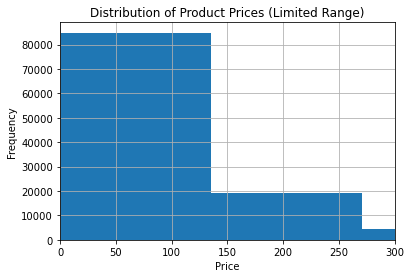

In [ ]:
# item price distribution
plt.hist(order_items['price'], bins=50)
plt.xlim(0, 300) 
plt.title('Distribution of Product Prices (Limited Range)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


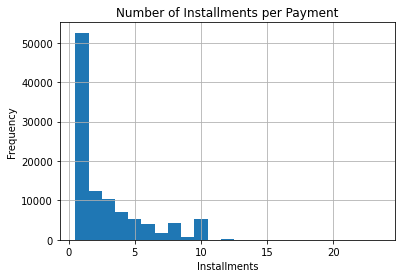

In [41]:
# Check the distribution of order payment types
plt.hist(order_payments['payment_installments'], bins=range(1, order_payments['payment_installments'].max()+1), align='left')
plt.title('Number of Installments per Payment')
plt.xlabel('Installments')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


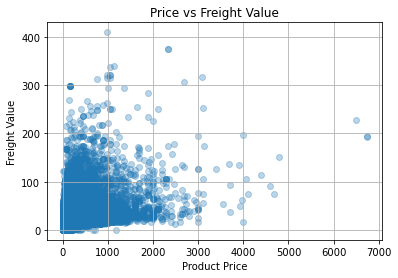

In [42]:
# High priced products and freight values
plt.scatter(order_items['price'], order_items['freight_value'], alpha=0.3)
plt.title('Price vs Freight Value')
plt.xlabel('Product Price')
plt.ylabel('Freight Value')
plt.grid(True)
plt.show()


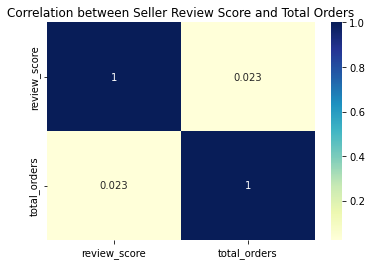

In [7]:
# Calculate average review score per order
avg_review_per_order = order_reviews.groupby('order_id')['review_score'].mean().reset_index()

merged = order_items.merge(avg_review_per_order, on='order_id', how='inner')

seller_grouped = merged.groupby('seller_id').agg({
    'review_score': 'mean',
    'order_id': 'nunique'
}).rename(columns={'order_id': 'total_orders'}).reset_index()

# Correlation heatmap between review score and total orders per seller

plt.figure(figsize=(6, 4))
sns.heatmap(seller_grouped[['review_score', 'total_orders']].corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation between Seller Review Score and Total Orders')
plt.show()


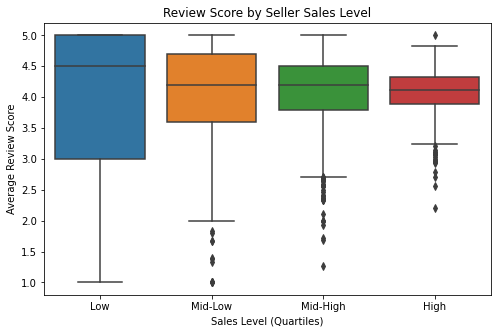

In [8]:
# Create quantile-based bins
seller_grouped['sales_level'] = pd.qcut(seller_grouped['total_orders'], q=4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])


plt.figure(figsize=(8, 5))
sns.boxplot(x='sales_level', y='review_score', data=seller_grouped)
plt.title('Review Score by Seller Sales Level')
plt.xlabel('Sales Level (Quartiles)')
plt.ylabel('Average Review Score')
plt.show()


## Export to MySQL

In [ ]:
from sqlalchemy import create_engine

# MySQL Connection info
user = "root"         
password =
host = "localhost"         
port = "3306"              
dbname =    

# Create SQLAlchemy Engine
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{dbname}")


In [ ]:
customers.to_sql(name="customers", con=engine, if_exists="replace", index=False)
orders.to_sql(name="orders", con=engine, if_exists="replace", index=False)
products.to_sql(name="products", con=engine, if_exists="replace", index=False) 
order_items.to_sql(name="order_items", con=engine, if_exists="replace", index=False)
order_payments.to_sql(name="order_payments", con=engine, if_exists="replace", index=False)
sellers.to_sql(name="sellers", con=engine, if_exists="replace", index=False)
geolocation.to_sql(name="geolocation", con=engine, if_exists="replace", index=False)
product_category_name_translation.to_sql(name="product_category_name_translation", con=engine, if_exists="replace", index=False)
order_reviews.to_sql(name="order_reviews", con=engine, if_exists="replace", index=False)

print("✅ Saving to MySQL complete!")


✅ Saving to MySQL complete!
